In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
trainf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WM/train_merged.csv')
testf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WM/test_merged.csv')

In [ ]:
trainf

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed Spider Man after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated
...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. â?? A pizza delivery man in M...","Pizza delivery man gets tipped more than $2,00...",agree
49968,2532,"ANN ARBOR, Mich. â?? A pizza delivery man in M...","Pizza delivery man gets $2,000 tip",agree
49969,2532,"ANN ARBOR, Mich. â?? A pizza delivery man in M...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",agree
49970,2532,"ANN ARBOR, Mich. â?? A pizza delivery man in M...",Ann Arbor pizza delivery driver surprised with...,agree


In [ ]:
testf

,Body ID,articleBody,Headline,Stance
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,unrelated
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,agree
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,unrelated
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold â??Editionâ?? Apple ...,unrelated
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,unrelated
...,...,...,...,...
25408,2586,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,disagree
25409,2586,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,agree
25410,2586,Remember how much Republicans wanted to repeal...,CBOâ??s Alternate Facts Show Obamacare is Unsu...,disagree
25411,2586,Remember how much Republicans wanted to repeal...,Why Obamacare failed,disagree


In [ ]:
totaldata=trainf['articleBody'].tolist()+trainf['Headline'].tolist()+ testf['articleBody'].tolist()+testf['Headline'].tolist()

In [ ]:
list(totaldata)

['A small meteorite crashed into a wooded area in Nicaragua\'s capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city\'s airport, the Associated Press reports. \r\n\r\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth." House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \r\nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\r\n\r\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was burie

In [ ]:
tfidf_vect = TfidfVectorizer(
    analyzer='word', max_features=80, stop_words='english')

In [ ]:
tfidf_vect.fit(totaldata)

In [ ]:
train_head_vec = tfidf_vect.transform(trainf['Headline'])
train_body_vec = tfidf_vect.transform(trainf['articleBody'])
test_head_vec = tfidf_vect.transform(testf['Headline'])
test_body_vec = tfidf_vect.transform(testf['articleBody'])

In [ ]:
print(train_head_vec)
print(train_head_vec.shape)

  (1, 36)	1.0
  (2, 29)	1.0
  (8, 29)	1.0
  (10, 54)	0.7646647398870104
  (10, 46)	0.6444283013443238
  (11, 76)	1.0
  (12, 60)	1.0
  (13, 54)	0.7549266702007807
  (13, 28)	0.655809212057563
  (15, 54)	1.0
  (17, 36)	1.0
  (18, 57)	0.6788293663237139
  (18, 29)	0.7342960516144321
  (19, 71)	0.5232813921440274
  (19, 53)	0.4211654319338745
  (19, 5)	0.5161585963333895
  (19, 0)	0.531391161961607
  (24, 54)	0.42792248847656467
  (24, 9)	0.9038154368321136
  (26, 9)	1.0
  (27, 50)	1.0
  (28, 37)	0.4999659117121545
  (28, 32)	0.5815785212861513
  (28, 23)	0.641716846205901
  (29, 56)	0.7502590602542081
  :	:
  (49956, 54)	0.44911275132561534
  (49956, 36)	0.40998251617476666
  (49956, 10)	0.4534159306790189
  (49958, 54)	1.0
  (49959, 37)	0.7292401244234192
  (49959, 24)	0.6842578760459511
  (49960, 76)	0.8984624313973169
  (49960, 54)	0.439050406408674
  (49961, 78)	0.4620185119072578
  (49961, 76)	0.45952688875540815
  (49961, 54)	0.44911275132561534
  (49961, 36)	0.40998251617476666
  (

In [ ]:
print(train_body_vec)
print(train_body_vec.shape)

  (0, 66)	0.10064691884956957
  (0, 64)	0.09276811985022926
  (0, 61)	0.11105881071156679
  (0, 55)	0.7411202618905149
  (0, 54)	0.19101636102965497
  (0, 53)	0.2210370799899344
  (0, 51)	0.34025817961316074
  (0, 41)	0.10874148438288235
  (0, 37)	0.12086982291504848
  (0, 19)	0.39095653536935093
  (0, 9)	0.1344819372940817
  (0, 2)	0.14554749539368594
  (1, 66)	0.10064691884956957
  (1, 64)	0.09276811985022926
  (1, 61)	0.11105881071156679
  (1, 55)	0.7411202618905149
  (1, 54)	0.19101636102965497
  (1, 53)	0.2210370799899344
  (1, 51)	0.34025817961316074
  (1, 41)	0.10874148438288235
  (1, 37)	0.12086982291504848
  (1, 19)	0.39095653536935093
  (1, 9)	0.1344819372940817
  (1, 2)	0.14554749539368594
  (2, 66)	0.10064691884956957
  :	:
  (49967, 79)	0.5927897170653849
  (49967, 73)	0.43382807946391705
  (49967, 55)	0.2802860173891112
  (49967, 36)	0.3956803782043677
  (49967, 0)	0.4746265221944405
  (49968, 79)	0.5927897170653849
  (49968, 73)	0.43382807946391705
  (49968, 55)	0.280286

In [ ]:
import nltk
import numpy as np
from sklearn import feature_extraction

In [ ]:
wnl = nltk.WordNetLemmatizer()

In [ ]:
def normalize_word(w):
    return wnl.lemmatize(w).lower()

def get_tokenized_lemmas(s):
    return [normalize_word(t) for t in nltk.word_tokenize(s)]

def clean(s):
    # Cleans a string: Lowercasing, trimming, removing non-alphanumeric
    return " ".join(re.findall(r'\w+', s, flags=re.UNICODE)).lower()

def remove_stopwords(l):
    # Removes stopwords from a list of tokens
    return [w for w in l if w not in feature_extraction.text.ENGLISH_STOP_WORDS]

In [ ]:
def ngrams(input, n):
  input = input.split(' ')
  output = []
  for i in range(len(input) - n + 1):
    output.append(input[i:i + n])
  return output

def chargrams(input, n):
  output = []
  for i in range(len(input) - n + 1):
    output.append(input[i:i + n])
  return output

def append_chargrams(features, text_headline, text_body, size):
  grams = [' '.join(x) for x in chargrams(" ".join(remove_stopwords(text_headline.split())), size)]
  grams_hits = 0
  grams_early_hits = 0
  grams_first_hits = 0
  for gram in grams:
    if gram in text_body:
      grams_hits += 1
    if gram in text_body[:255]:
      grams_early_hits += 1
    if gram in text_body[:100]:
      grams_first_hits += 1
  features.append(grams_hits)
  features.append(grams_early_hits)
  features.append(grams_first_hits)
  return features

def append_ngrams(features, text_headline, text_body, size):
  grams = [' '.join(x) for x in ngrams(text_headline, size)]
  grams_hits = 0
  grams_early_hits = 0
  for gram in grams:
    if gram in text_body:
      grams_hits += 1
    if gram in text_body[:255]:
      grams_early_hits += 1
  features.append(grams_hits)
  features.append(grams_early_hits)
  return features

def hand_features(headlines, bodies):
  def binary_co_occurence(headline, body):
    # Count how many times a token in the title appears in the body text.
    bin_count = 0
    bin_count_early = 0    
    for headline_token in clean(headline).split(" "):
      if headline_token in clean(body):
        bin_count += 1
      if headline_token in clean(body)[:255]:
        bin_count_early += 1
    return [bin_count, bin_count_early]    

  def binary_co_occurence_stops(headline, body):
    # Count how many times a token in the title appears in the body text. 
    # Stopwords in the title are ignored.
    bin_count = 0
    bin_count_early = 0
    for headline_token in remove_stopwords(clean(headline).split(" ")):
      if headline_token in clean(body):
        bin_count += 1
        bin_count_early += 1
    return [bin_count, bin_count_early]
    
  def count_grams(headline, body):
    # Count how many times an n-gram of the title
    # appears in the entire body, and intro paragraph
    clean_body = clean(body)
    clean_headline = clean(headline)
    features = []
    features = append_chargrams(features, clean_headline, clean_body, 2)
    features = append_chargrams(features, clean_headline, clean_body, 4)
    features = append_chargrams(features, clean_headline, clean_body, 8)
    features = append_chargrams(features, clean_headline, clean_body, 16)
    features = append_ngrams(features, clean_headline, clean_body, 2)
    features = append_ngrams(features, clean_headline, clean_body, 3)
    features = append_ngrams(features, clean_headline, clean_body, 4)
    features = append_ngrams(features, clean_headline, clean_body, 5)
    features = append_ngrams(features, clean_headline, clean_body, 6)
    return features

  X = []
  for i, (headline, body) in tqdm(enumerate((headlines, bodies))):
    lst= binary_co_occurence(headline, body) + binary_co_occurence_stops(headline, body) + count_grams(headline, body)
    X.append(lst)

  X =np.array(X)
  return X  

In [ ]:
train_handF = hand_features(trainf['Headline'].tolist(), trainf['articleBody'].tolist())
test_handF = hand_features(testf['Headline'].tolist(), testf['articleBody'].tolist())

49972it [03:13, 258.23it/s]
25413it [01:30, 282.14it/s]


In [ ]:
print(train_handF)
print(train_handF.shape)

[[ 1  1  0 ...  0  0  0]
 [ 3  1  1 ...  0  0  0]
 [ 2  2  0 ...  0  0  0]
 ...
 [ 5  3  5 ...  0  0  0]
 [10  6  9 ...  0  0  0]
 [10  6  9 ...  0  0  0]]
(49972, 26)


In [ ]:
# Combine the tfidf features of headline and body
train_final= hstack([train_head_vec,train_body_vec]).toarray()
test_final= hstack([test_head_vec,test_body_vec]).toarray()

In [ ]:
# Combine both tfidf features and our handmade features
train_final =np.concatenate((train_final,train_handF), axis=1)
test_final =np.concatenate((test_final,test_handF), axis=1)

In [ ]:
print(type(train_final), train_final.shape,'\n', type(test_final), test_final.shape)

<class 'numpy.ndarray'> (49972, 186) 
 <class 'numpy.ndarray'> (25413, 186)


In [ ]:
print(train_final)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
trainf.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed Spider Man after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated


In [ ]:
train_labels= trainf['Stance'].copy()
test_labels= testf['Stance'].copy()

In [ ]:
print(train_labels.value_counts())

unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64


In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.models import Sequential
from tensorflow import keras

In [ ]:
model = Sequential()
model.add(Input(shape=(186,)))
model.add(keras.layers.Dense(200 , activation='sigmoid'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(100 , activation='sigmoid'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(50 , activation='sigmoid'))
model.add(keras.layers.Dense(4 , activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               37400     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 4)                 204       
                                                                 
Total params: 62,754
Trainable params: 62,754
Non-traina

In [ ]:
Y = pd.get_dummies(trainf['Stance']).values
print(Y)
print(Y.shape)

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]
(49972, 4)


In [ ]:
testY = pd.get_dummies(testf['Stance']).values

In [ ]:
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=4,monitor='val_accuracy')

In [ ]:
history = model.fit(train_final,Y,epochs=20,batch_size=10,validation_split=0.2,verbose=1,callbacks=[early_stopping_monitor])

Epoch 1/20
3998/3998 [==============================] - 12s 3ms/step - loss: 0.3254 - accuracy: 0.8801 - val_loss: 0.4189 - val_accuracy: 0.8418
Epoch 2/20
3998/3998 [==============================] - 12s 3ms/step - loss: 0.2614 - accuracy: 0.8996 - val_loss: 0.3950 - val_accuracy: 0.8515
Epoch 3/20
3998/3998 [==============================] - 12s 3ms/step - loss: 0.2486 - accuracy: 0.9068 - val_loss: 0.4165 - val_accuracy: 0.8513
Epoch 4/20
3998/3998 [==============================] - 11s 3ms/step - loss: 0.2429 - accuracy: 0.9083 - val_loss: 0.3813 - val_accuracy: 0.8522
Epoch 5/20
3998/3998 [==============================] - 11s 3ms/step - loss: 0.2361 - accuracy: 0.9099 - val_loss: 0.3965 - val_accuracy: 0.8576
Epoch 6/20
3998/3998 [==============================] - 11s 3ms/step - loss: 0.2310 - accuracy: 0.9128 - val_loss: 0.3944 - val_accuracy: 0.8551
Epoch 7/20
3998/3998 [==============================] - 11s 3ms/step - loss: 0.2273 - accuracy: 0.9146 - val_loss: 0.3905 - val_ac

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

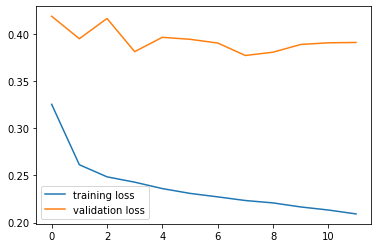

<Figure size 432x288 with 0 Axes>

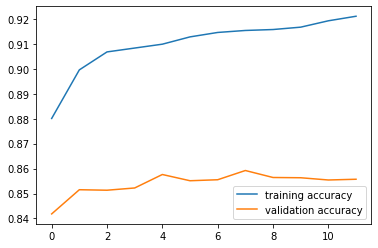

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(range(len(loss)), loss, label="training loss")
plt.plot(range(len(val_loss)), val_loss, label="validation loss")
plt.legend(loc="best")
plt.figure(figsize=(6,4))
plt.show()
plt.plot(range(len(accuracy)), accuracy, label="training accuracy")
plt.plot(range(len(val_accuracy)), val_accuracy, label="validation accuracy")
plt.legend(loc="best")
plt.figure(figsize=(6,4))
plt.show()

In [ ]:
model.evaluate([test_final],[testY])

795/795 [==============================] - 2s 2ms/step - loss: 0.3792 - accuracy: 0.8636


[0.3791715204715729, 0.8636131286621094]

In [ ]:
prediction = model.predict([test_final],verbose=1)

795/795 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(testY.argmax(axis=1), prediction.argmax(axis=1))
cfm

array([[  728,     0,   908,   267],
       [  232,     5,   238,   222],
       [  649,     0,  3150,   665],
       [   33,     0,   252, 18064]])

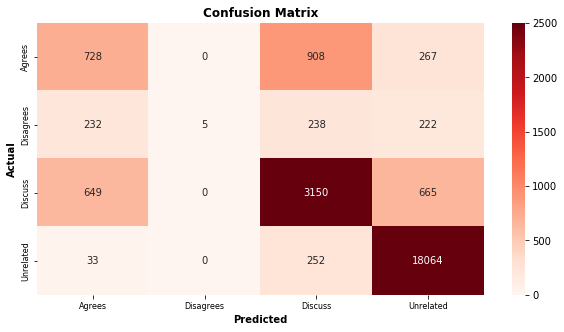

In [ ]:
# PLotting Confusion Matrix
categories = ['Agrees', 'Disagrees', 'Discuss', 'Unrelated']

CMatrix = pd.DataFrame( (cfm) , columns=categories, index =categories)

plt.figure(figsize=(10, 5))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 2500,cmap = 'Reds')
ax.set_xlabel('Predicted',fontsize = 10,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 8);
ax.set_ylabel('Actual',fontsize = 10,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_title('Confusion Matrix',fontsize = 12,weight = 'bold');
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(testY.argmax(axis=1),prediction.argmax(axis=1), target_names=['Agrees','Disagrees','Discuss','Unrelated'])
print(cr)

              precision    recall  f1-score   support

      Agrees       0.44      0.38      0.41      1903
   Disagrees       1.00      0.01      0.01       697
     Discuss       0.69      0.71      0.70      4464
   Unrelated       0.94      0.98      0.96     18349

    accuracy                           0.86     25413
   macro avg       0.77      0.52      0.52     25413
weighted avg       0.86      0.86      0.85     25413



In [ ]:
test_labels.value_counts()

unrelated    18349
discuss       4464
agree         1903
disagree       697
Name: Stance, dtype: int64